In [1]:
import pandas as pd
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [3]:
df.shape

(5110, 12)

In [4]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


There are 201 missing values on bmi column.

In [6]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

The null values on bmi are filled out.

In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<AxesSubplot:xlabel='stroke', ylabel='count'>

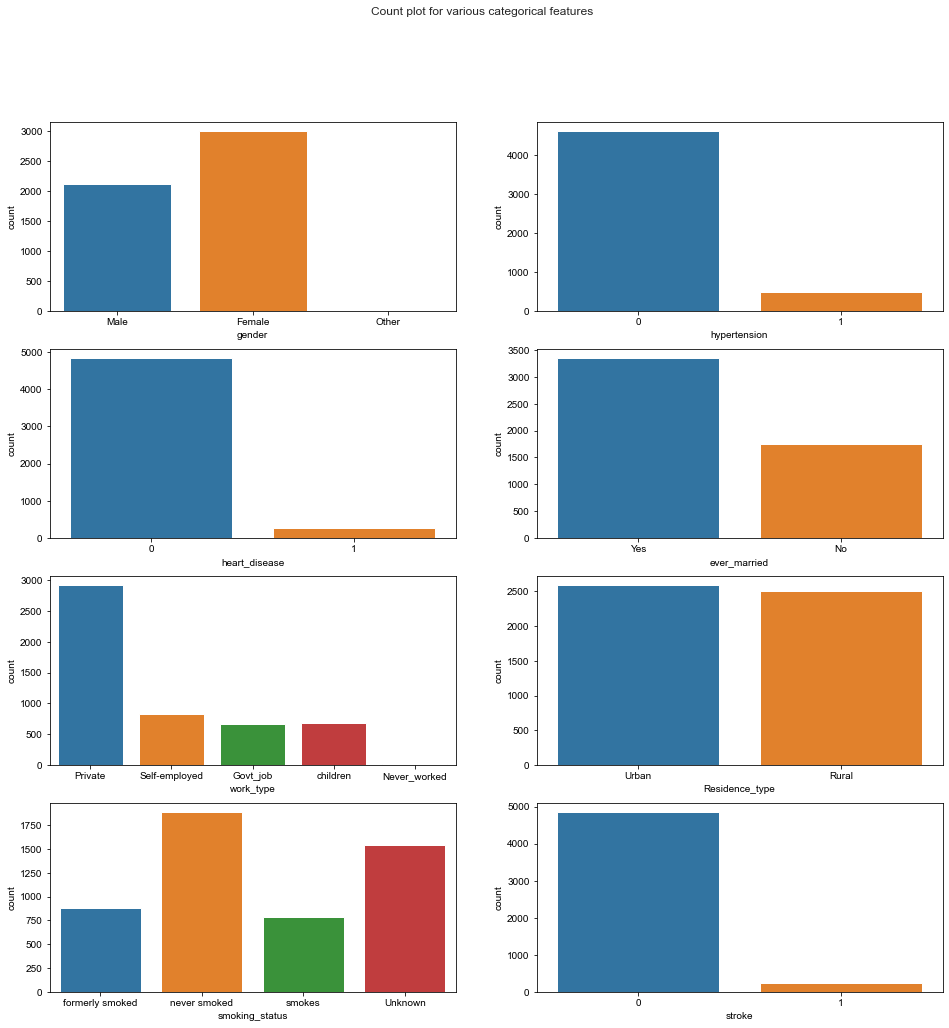

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('whitegrid')
fig.suptitle("Count plot for various categorical features")

sns.countplot(ax=axes[0,0],data=df,x='gender')
sns.countplot(ax=axes[0,1],data=df,x='hypertension')
sns.countplot(ax=axes[1,0],data=df,x='heart_disease')
sns.countplot(ax=axes[1,1],data=df,x='ever_married')
sns.countplot(ax=axes[2,0],data=df,x='work_type')
sns.countplot(ax=axes[2,1],data=df,x='Residence_type')
sns.countplot(ax=axes[3,0],data=df,x='smoking_status')
sns.countplot(ax=axes[3,1],data=df,x='stroke')

Females are more than males.




There are 5 distinct categories on work type.

There are 4 different categories on smoking status.

Stroke data is highly unbalanced.

In [9]:
import pandas as pd
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [10]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

"Other" category was removed as it has only one value. 

<function matplotlib.pyplot.show(close=None, block=None)>

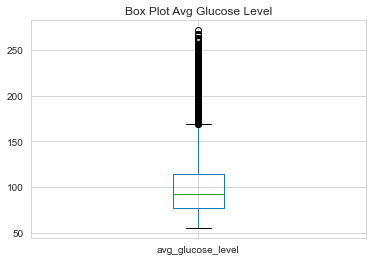

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

df.boxplot(column='avg_glucose_level')
plt.title('Box Plot Avg Glucose Level')
plt.show




In [12]:

Q1=df.quantile(.25, axis=0)
Q3=df.quantile(.75, axis=0)
IQR = Q3 -Q1
Lower_Limit = Q1 - 1.5 * IQR
Upper_Limit = Q3 + 1.5 * IQR

Outliers = df[ ((df < Lower_Limit)| ((df > Upper_Limit))).any(axis=1) ]
print(len(Outliers),"Outliers")
print(len(df)-len(Outliers)," Without Outliers")

Percentage_Outliers = len(Outliers)/len(df)*100
print(Percentage_Outliers, " % Outliers")

1286 Outliers
3823  Without Outliers
25.17126639264044  % Outliers


<function matplotlib.pyplot.show(close=None, block=None)>

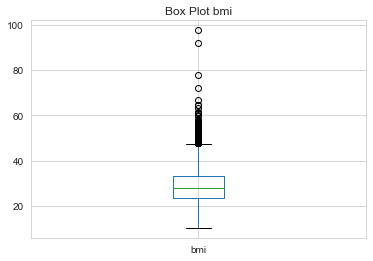

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

df.boxplot(column='bmi')
plt.title('Box Plot bmi')
plt.show

In [14]:
Q1=df.quantile(.25, axis=0)
Q3=df.quantile(.75, axis=0)
IQR = Q3 -Q1
Lower_Limit = Q1 - 1.5 * IQR
Upper_Limit = Q3 + 1.5 * IQR
Outliers = df[ ((df < Lower_Limit)| ((df > Upper_Limit))).any(axis=1) ]
print(len(Outliers),"Outliers")
print(len(df)-len(Outliers)," Without Outliers")

Percentage_Outliers = len(Outliers)/len(df)*100
print(Percentage_Outliers, " % Outliers")

1286 Outliers
3823  Without Outliers
25.17126639264044  % Outliers


,stroke
age,0.245239
hypertension,0.127891
heart_disease,0.134905
avg_glucose_level,0.131991
bmi,0.042341
stroke,1.000000


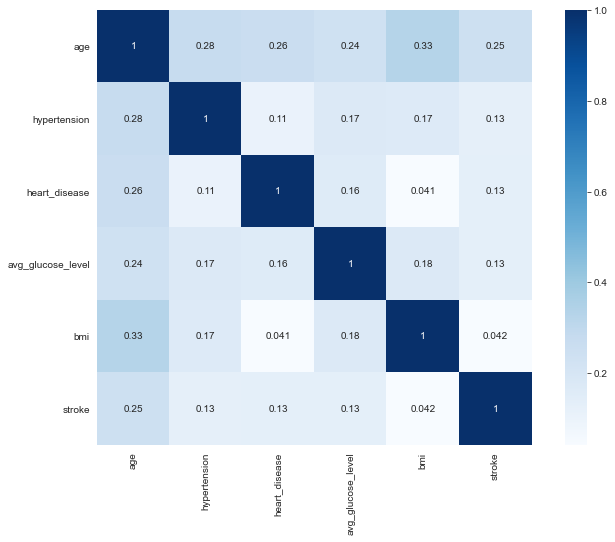

In [15]:
corr = pd.DataFrame(df.drop(['id'], axis = 1).corr())
fig=plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="Blues", square=True)
pd.DataFrame(corr.stroke)

There is not any strong correlations so we can use logistic regression.

In [16]:
correlated_df = df.corr()
correlated_df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,-0.472965,-0.344500,-0.318978,-0.359891,-0.313849,-0.297605
age,-0.472965,1.000000,0.134127,0.103943,0.037973,0.279396,0.058635
hypertension,-0.344500,0.134127,1.000000,-0.162105,-0.032001,-0.000032,-0.116358
heart_disease,-0.318978,0.103943,-0.162105,1.000000,-0.042746,-0.288587,-0.057649
avg_glucose_level,-0.359891,0.037973,-0.032001,-0.042746,1.000000,-0.003146,-0.118098
bmi,-0.313849,0.279396,-0.000032,-0.288587,-0.003146,1.000000,-0.290932
stroke,-0.297605,0.058635,-0.116358,-0.057649,-0.118098,-0.290932,1.000000


<AxesSubplot:>

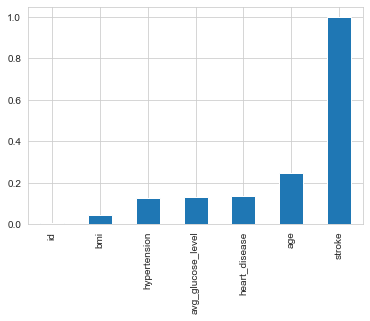

In [17]:
correlated_stroke =correlated_df["stroke"]
correlated_stroke.sort_values().plot(kind='bar')

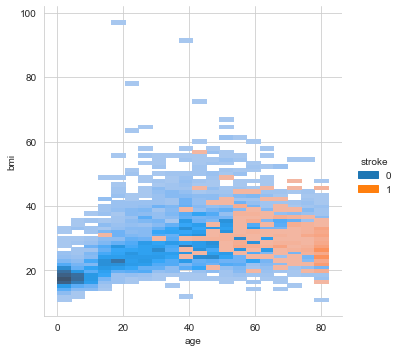

In [18]:
sns.displot(data = df,x = 'age',y = 'bmi',hue = 'stroke')

C:\Users\wilda\anaconda3\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


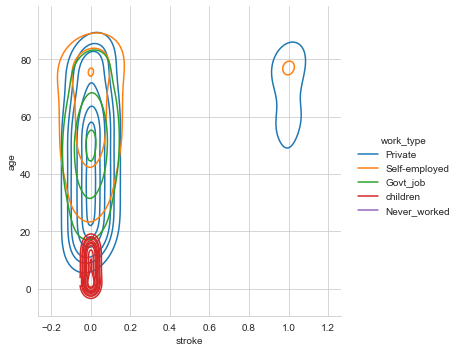

In [19]:
sns.displot(x = df.stroke,y = df.age,hue = df.work_type,kind = 'kde')

Goverment jobs are least prone to stroke while private jobs have the highest stroke events.

<AxesSubplot:xlabel='bmi', ylabel='age'>

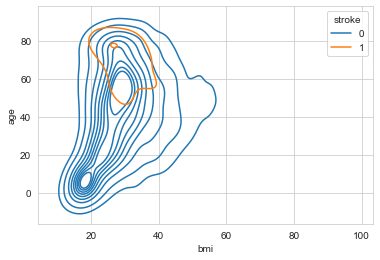

In [20]:
sns.kdeplot(data = df,x = 'bmi',y = 'age',hue = 'stroke',fill = False)

BMI doesnt effect the stroke.

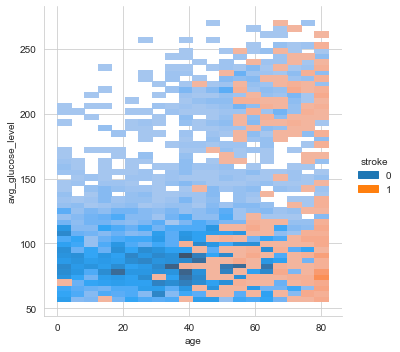

In [21]:
sns.displot(data = df,x = 'age',y = 'avg_glucose_level',hue = 'stroke')

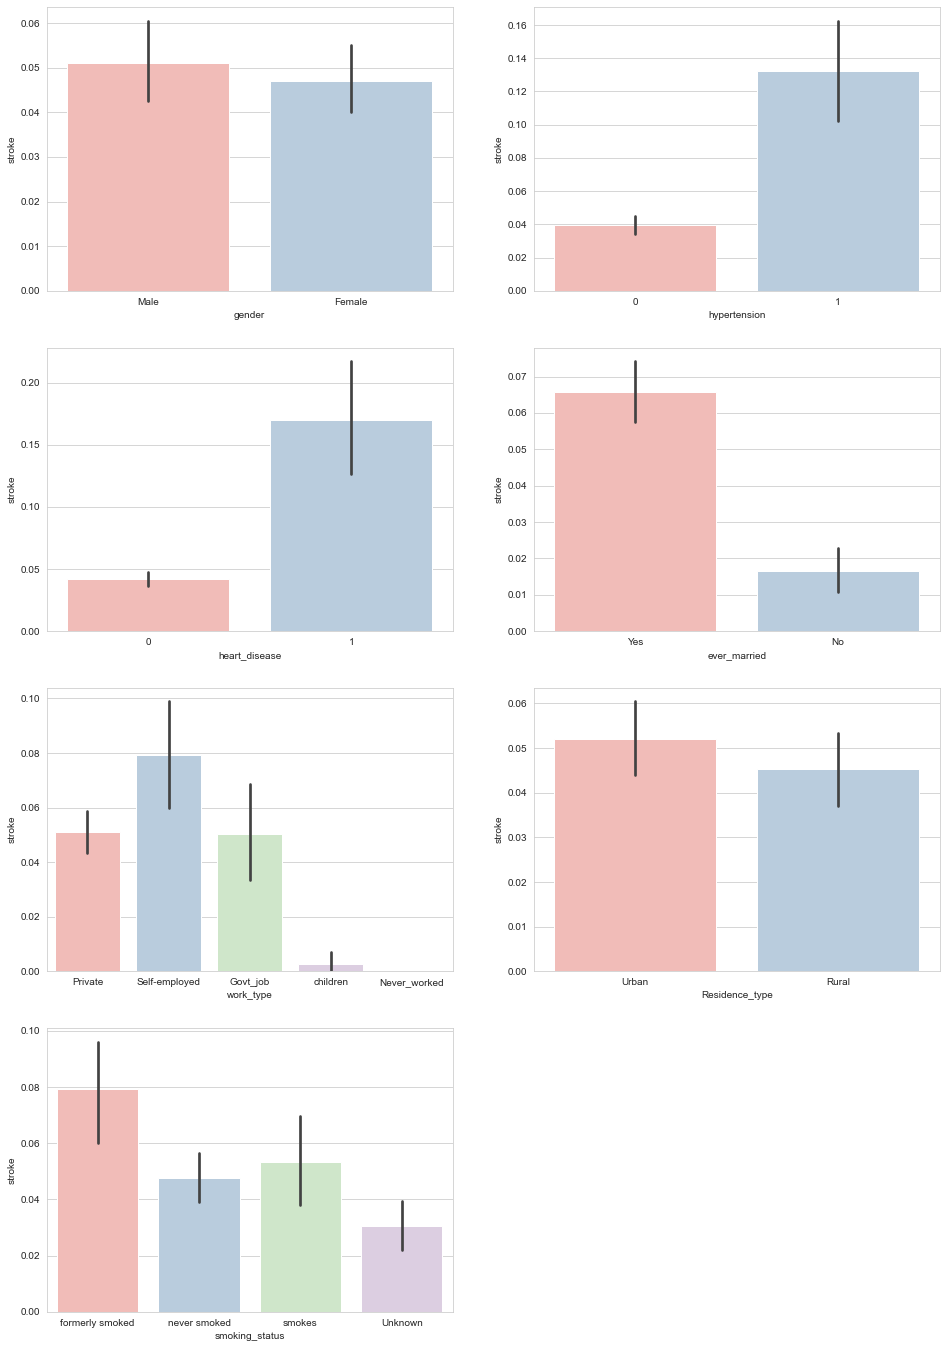

In [22]:
fig=plt.figure(figsize=(16, 24))

for index, column in enumerate(list(df.columns.drop(['stroke', 'id', 'age', 'avg_glucose_level', 'bmi']).values)):
    fig.add_subplot(4, 2, index + 1)
    plots = sns.barplot(data=df, y="stroke" ,palette='Pastel1', x=column)

plt.show()

Who are more likely to get stroke? Hypertension, Heart Disease, Male, Married, Urban,Self-employed, Formerly and Currently smoked

Who are less likely to get stroke? No Hypertension, No Heart Disease, Female, Un-married, Rural, Children, Never Smoked

In [23]:
df.groupby('stroke').mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,,
0,36483.189300,41.974831,0.088889,0.047119,104.787584,28.824431
1,37115.068273,67.728193,0.265060,0.188755,132.544739,30.471292


In [24]:
df.groupby('heart_disease').mean()

,id,age,hypertension,avg_glucose_level,bmi,stroke
heart_disease,,,,,,
0,36520.319677,41.804676,0.089799,104.388438,28.820493,0.041796
1,36403.068841,68.188406,0.231884,136.818768,30.316461,0.170290


In [25]:
df.groupby('hypertension').mean()

,id,age,heart_disease,avg_glucose_level,bmi,stroke
hypertension,,,,,,
0,36488.884190,41.176318,0.045977,103.543088,28.475432,0.039688
1,36746.399598,62.244980,0.128514,130.188996,33.036585,0.132530


In [26]:
df.groupby('ever_married').mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
ever_married,,,,,,,
No,36106.261959,22.011959,0.030182,0.018223,96.421452,25.216373,0.016515
Yes,36727.514465,54.342082,0.132717,0.072771,111.230310,30.850749,0.065613


In [27]:
df.groupby('gender').mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender,,,,,,,
Female,36479.685037,43.757395,0.092184,0.037742,104.057809,29.065758,0.047094
Male,36562.541371,42.483385,0.104965,0.077069,109.088520,28.647936,0.051064


In [28]:
df.groupby('Residence_type').mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
Residence_type,,,,,,,
Rural,36540.195384,42.907537,0.099881,0.053323,106.360529,28.896898,0.045364
Urban,36488.613636,43.542126,0.095146,0.054700,105.927307,28.892289,0.052003


In [29]:
df.groupby('smoking_status').mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
smoking_status,,,,,,,
Unknown,35899.042098,30.229922,0.033679,0.031088,99.601541,25.666352,0.030440
formerly smoked,36857.175339,54.962670,0.135747,0.087104,112.851640,30.757177,0.079186
never smoked,36833.141649,46.744715,0.122622,0.047569,107.558092,29.982559,0.047569
smokes,36567.533587,47.096324,0.119138,0.077313,108.017440,30.543555,0.053232


In [30]:
df.groupby('work_type').mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
work_type,,,,,,,
Govt_job,36516.936073,50.879756,0.111111,0.054795,107.779772,30.522063,0.050228
Never_worked,38274.409091,16.181818,0.000000,0.000000,96.042727,25.545455,0.000000
Private,36944.659029,45.510602,0.096101,0.054036,106.784350,30.307438,0.050958
Self-employed,35551.288156,60.201465,0.175824,0.098901,112.645446,30.211871,0.079365
children,35769.432314,6.841339,0.000000,0.001456,94.400277,20.038003,0.002911


In [31]:
cat_vars=['work_type','smoking_status','Residence_type', 'gender','ever_married']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    df=data1
cat_vars=['work_type','smoking_status','Residence_type', 'gender','ever_married']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

In [32]:
df_final=df[to_keep]
df_final.columns.values

array(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'Residence_type_Rural',
       'Residence_type_Urban', 'gender_Female', 'gender_Male',
       'ever_married_No', 'ever_married_Yes'], dtype=object)

In [33]:
import pandas as pd
import numpy as np
#from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


X = df_final.loc[:, df_final.columns != 'stroke']
y = df_final.loc[:, df_final.columns == 'stroke']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['stroke'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no stroke in oversampled data",len(os_data_y[os_data_y['stroke']==0]))
print("Number of stroke",len(os_data_y[os_data_y['stroke']==1]))
print("Proportion of no stroke data in oversampled data is ",len(os_data_y[os_data_y['stroke']==0])/len(os_data_X))
print("Proportion of stroke data in oversampled data is ",len(os_data_y[os_data_y['stroke']==1])/len(os_data_X))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
pip install -U imbalanced-learn

In [ ]:
df_final.info()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

cat_vars=['work_type','smoking_status','Residence_type', 'gender','ever_married']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]
df_final=df[to_keep]

X = df_final.loc[:, df_final.columns != 'stroke']
y = df_final.loc[:, df_final.columns == 'stroke']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

df=pd.DataFrame({'odds_ratio':(np.exp(logreg.coef_).T).tolist(),'variable':X.columns.tolist()})
df['odds_ratio'] = df['odds_ratio'].str.get(0)

df=df.sort_values('odds_ratio', ascending=False)
df